In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("polinomial.csv")

In [128]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


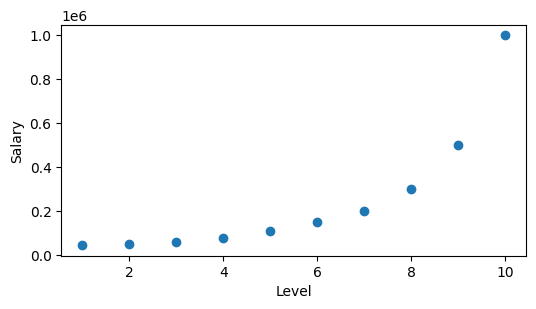

In [129]:
plt.figure(figsize=(6,3))
plt.scatter(df["Level"] , df["Salary"])
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()
# the curve nature is polinomial

<Axes: >

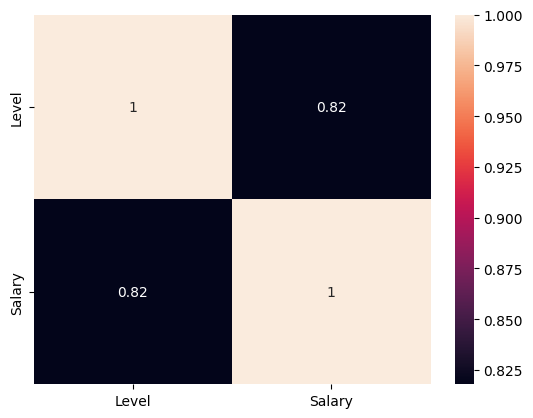

In [130]:
cor = df[["Level" , "Salary"]].corr()
sns.heatmap(cor , annot = True)
# correlation cofficinet near about 1 looks depends each other and make liner graph but it is polinomial

In [131]:
from sklearn.preprocessing import PolynomialFeatures


In [132]:
x = df[["Level"]]
y = df["Salary"]
# x is always  2d and y is 1d

In [133]:
# change the input and convert into a polinomial
# at degree 5 it is giving the 97% accuracy i am suprised but at degree 2 is is about 60
pf = PolynomialFeatures(degree =5)
pf.fit(x)
x_new  = pf.transform(x)
x_new

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

In [134]:
x = x_new

In [135]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [136]:
x_train , x_test , y_train , y_test = train_test_split(x ,y , test_size = .15 , random_state =43)

In [137]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [138]:
lr.score(x_test , y_test)

0.977177622291204

In [139]:
# make a test case
# first convert the data into polinomial using PolynomialFeatures
temp = pf.transform([[3]])
lr.predict(temp)

C:\Users\G\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([59783.21103484])

In [140]:
y_new = lr.predict(x)

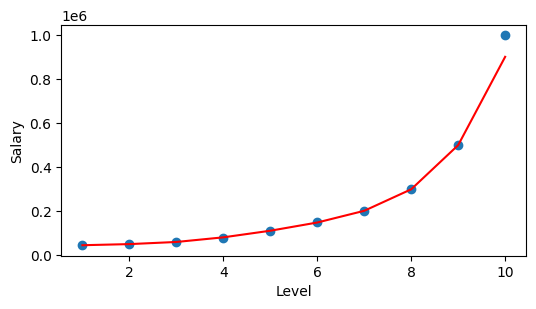

In [141]:
plt.figure(figsize=(6,3))
plt.scatter(df["Level"] , df["Salary"])
plt.plot(df["Level"] , y_new , color ="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()
# the curve nature is polinomial